In [9]:
# Import libraries

## Manage dataframe of importing data (Trainning data)
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

## Visualize the importing data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [10]:
# Import data
data = pd.read_csv('original_CMKL1.csv')

# feature = data[['RSSI1', 'RSSI2', 'RSSI3', 'RSSI4', 'RSSI5', 'RSSI6', 'RSSI7', 'RSSI8', 'RSSI9', 'RSSI10', 'RSSI11', 'RSSI12', 'RSSI13', 'RSSI14', 'RSSI15', 'RSSI16', 'RSSI17', 'RSSI18', 'x', 'y', 'z']].values
feature = data[['x', 'y', 'z']].values
target = data.iloc[:, 1:19].values
X = feature
y = target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import joblib

# Define the models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    XGBRegressor()
]

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},  # No hyperparameters to tune
    'Ridge': {'alpha': uniform(0, 1)},
    'Lasso': {'alpha': uniform(0, 1)},
    'DecisionTreeRegressor': {'max_depth': randint(1, 20)},
    'RandomForestRegressor': {
        'n_estimators': randint(50, 500),
        'max_depth': randint(5, 50),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': uniform(0, 1)
    },
    'KNeighborsRegressor': {'n_neighbors': randint(1, 20)},
    'XGBRegressor': {
        'n_estimators': randint(50, 500),
        'max_depth': randint(3, 20),
        'learning_rate': uniform(0.01, 0.5),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5),
        'gamma': uniform(0, 2)
    }
}

# Perform Randomized Search for each model or Load the previously saved models
try:
    random_best_models = joblib.load('CMKL_best_models.pkl')
    print("Loaded best models from file.")
except FileNotFoundError:
    random_best_models = {}
    for model_name, model in zip([model.__class__.__name__ for model in models], models):
        if model_name in param_grids:
            param_grid = param_grids[model_name]
            random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)
            random_search.fit(X_train, y_train)
            random_best_models[model_name] = random_search.best_estimator_
            print(f"Best parameters for {model_name}:", random_search.best_params_)
        else:
            print(f"No hyperparameters to tune for {model_name}")
        
        print("---------------------------------------------------------")
    # Save the best models to a file
    joblib.dump(random_best_models, 'CMKL_best_models.pkl')
    print("Saved best models to file.")

# Best models found
print("\nBest models found:")
for model_name, model in random_best_models.items():
    print(f"{model_name}: {model}")


c:\Users\prabw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.4.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\prabw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.4.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\prabw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Lass

Loaded best models from file.

Best models found:
LinearRegression: LinearRegression()
Ridge: Ridge(alpha=0.005522117123602399)
Lasso: Lasso(alpha=0.13949386065204183)
DecisionTreeRegressor: DecisionTreeRegressor(max_depth=15)
RandomForestRegressor: RandomForestRegressor(max_depth=35, max_features=0.9636199770892528,
                      n_estimators=305)
KNeighborsRegressor: KNeighborsRegressor(n_neighbors=8)
XGBRegressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.894809071397277, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.18241220609738074,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25721015235129074,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_

c:\Users\prabw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:27:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [12]:
# Train separate models for each of the 18 RSSI values
ensemble_grid_search_models = {}
for i in range(y_train.shape[1]):
    model = VotingRegressor(estimators=list(random_best_models.items()))
    model.fit(X_train, y_train[:, i])  # Train the model for the i-th RSSI value
    ensemble_grid_search_models[i] = model

# Evaluate the models
mae_scores = {}
for i, model in ensemble_grid_search_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test[:, i], y_pred)
    mae_scores[i] = mae

# Print the mean absolute error scores for each RSSI value
for i, mae in mae_scores.items():
    print(f"RSSI Value {i+1}: Mean Absolute Error = {mae}")

RSSI Value 1: Mean Absolute Error = 3.1186812584930683
RSSI Value 2: Mean Absolute Error = 2.9740884918266155
RSSI Value 3: Mean Absolute Error = 3.400509411843059
RSSI Value 4: Mean Absolute Error = 2.4971374813212335
RSSI Value 5: Mean Absolute Error = 1.2735316200181606
RSSI Value 6: Mean Absolute Error = 3.5802329369847548
RSSI Value 7: Mean Absolute Error = 3.7709158614564036
RSSI Value 8: Mean Absolute Error = 4.45247761109628
RSSI Value 9: Mean Absolute Error = 2.5743940990376477
RSSI Value 10: Mean Absolute Error = 4.812059694410661
RSSI Value 11: Mean Absolute Error = 3.8716943234956758
RSSI Value 12: Mean Absolute Error = 4.376911613361222
RSSI Value 13: Mean Absolute Error = 3.5681392378834738
RSSI Value 14: Mean Absolute Error = 4.023872590119775
RSSI Value 15: Mean Absolute Error = 4.4037658202294585
RSSI Value 16: Mean Absolute Error = 3.5925009668771684
RSSI Value 17: Mean Absolute Error = 4.23565188808921
RSSI Value 18: Mean Absolute Error = 3.8787195719229697


In [13]:
# Predict RSSI values using each model
ensemble_grid_search_predictions = {}
for model_name, model in ensemble_grid_search_models.items():
    y_pred = model.predict(X_test)
    ensemble_grid_search_predictions[model_name] = y_pred

print(X_test)

# Print the coordinates (x, y, z) and predictions for each sample
for i, (coordinates, y_preds) in enumerate(zip(X_test, zip(*ensemble_grid_search_predictions.values()))):
    print(f"Prediction {i+1}: Coordinates (x, y, z) = {coordinates}, \nPredicted RSSI values = {', '.join(str(pred) for pred in y_preds)}")
    print("------------------------------------------------------")

[[14.39999962 30.00000076  0.        ]
 [ 2.4000001  20.39999962  1.        ]
 [ 2.4000001  18.          1.        ]
 ...
 [ 3.5999999  33.59999924  0.        ]
 [ 3.5999999  33.59999847  1.        ]
 [-1.20000005 30.          0.        ]]
Prediction 1: Coordinates (x, y, z) = [14.39999962 30.00000076  0.        ], 
Predicted RSSI values = -98.7088748219684, -99.80884836147503, -95.12463850097375, -99.238480203927, -99.64763233432942, -101.01135385348337, -101.57382616734205, -75.88855455359274, -93.76099894231034, -84.28411043492133, -69.639665001741, -74.62579359068948, -78.00787410677675, -80.99942416466565, -94.13828231766222, -98.07396596180804, -78.23538149833442, -97.67481840908803
------------------------------------------------------
Prediction 2: Coordinates (x, y, z) = [ 2.4000001  20.39999962  1.        ], 
Predicted RSSI values = -91.56407574161373, -71.70672850040206, -95.960232317689, -97.06919919883629, -99.42933704196412, -77.0054428624288, -80.39843275756019, -100.588

In [14]:
# Import data
data = pd.read_csv('original_CMKL1.csv')

# separate coordinates and rssi value
coordinates = data[['x', 'y', 'z']].values
rssi_values = data.iloc[:, 1:19].values


In [15]:
# Generate synthetic data coordinates for each reference point
synthetic_coordinates = []
step_sizes = 0.1
point_seprate_size = 1.2

for reference_point in coordinates:
    # print(reference_point)
    for x in np.arange(reference_point[0] - (point_seprate_size/2), reference_point[0] + (point_seprate_size/2), step_sizes):
        # print(x)
        for y in np.arange(reference_point[1] - (point_seprate_size/2), reference_point[1] + (point_seprate_size/2), step_sizes):
            # print(y)
            z = reference_point[2]
            # print([x, y, z])
            synthetic_coordinates.append([x, y, z])
                
# print(synthetic_coordinates)
                
synthetic_coordinates = np.array(synthetic_coordinates)

# print(len(synthetic_coordinates))

In [16]:
# Predict RSSI values using each model
ensemble_grid_search_predictions = {}
for model_name, model in ensemble_grid_search_models.items():
    y_pred = model.predict(synthetic_coordinates)
    y_pred = np.where(y_pred <= -100, -100, y_pred)
    ensemble_grid_search_predictions[model_name] = y_pred
    
print(ensemble_grid_search_predictions)

{0: array([-100.        , -100.        , -100.        , ...,  -90.1799375 ,
        -90.15594089,  -90.52842538]), 1: array([-100.        , -100.        , -100.        , ...,  -80.70874275,
        -80.69005019,  -80.83703321]), 2: array([-100.        , -100.        , -100.        , ...,  -93.33710321,
        -93.32301485,  -93.4825072 ]), 3: array([-100.        , -100.        , -100.        , ...,  -95.86154486,
        -95.84954127,  -95.82017317]), 4: array([-99.49650775, -99.49606109, -99.49561442, ..., -97.31506098,
       -97.31461432, -97.32683354]), 5: array([-95.98043156, -95.99330154, -96.00617152, ..., -77.96270636,
       -77.97557634, -78.10739076]), 6: array([-91.59535713, -91.62343005, -91.65150298, ..., -84.58808789,
       -84.61616082, -85.22486664]), 7: array([ -97.49634973,  -97.4644634 ,  -97.43257708, ..., -100.        ,
       -100.        , -100.        ]), 8: array([-99.32692829, -99.32955028, -99.33217226, ..., -99.01291697,
       -99.01553895, -99.02879195]

In [17]:
print(len(synthetic_coordinates))
print(len(ensemble_grid_search_predictions[0]))
print(len(ensemble_grid_search_predictions[1]))



769014
769014
769014


In [18]:
import csv

# Define the header for the CSV file
header = ["RSSI1", "RSSI2", "RSSI3", "RSSI4", "RSSI5", "RSSI6", "RSSI7", "RSSI8", "RSSI9", "RSSI10", 
          "RSSI11", "RSSI12", "RSSI13", "RSSI14", "RSSI15", "RSSI16", "RSSI17", "RSSI18", "x", "y", "z"]

# Define the filename
filename = "synthetic_data_RandomSeaerch_Ensemble.csv"

# Write data to CSV file
with open(filename, 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(header)
    
    # Write the data rows
    for i in range(len(synthetic_coordinates)):
        
        row = []
        
        # Convert RSSI values to floats
        for j in ensemble_grid_search_predictions.keys():
            row.append(float(ensemble_grid_search_predictions[j][i]))
        
        # Convert coordinates to floats
        for j in range(len(synthetic_coordinates[i])):
            row.append(float(synthetic_coordinates[i][j]))
        
        # print(row)
        
        # Write the row to the CSV file
        writer.writerow(row)

print(f"CSV file '{filename}' has been created successfully!")

CSV file 'synthetic_data_RandomSeaerch_Ensemble.csv' has been created successfully!


In [19]:
print(len(synthetic_coordinates))

769014


In [20]:
print(synthetic_coordinates)

[[-0.6        -0.6         0.        ]
 [-0.6        -0.5         0.        ]
 [-0.6        -0.4         0.        ]
 ...
 [ 9.80000019 17.79999962  1.        ]
 [ 9.80000019 17.89999962  1.        ]
 [ 9.80000019 17.99999962  1.        ]]


In [21]:
print(ensemble_grid_search_predictions)

{0: array([-100.        , -100.        , -100.        , ...,  -90.1799375 ,
        -90.15594089,  -90.52842538]), 1: array([-100.        , -100.        , -100.        , ...,  -80.70874275,
        -80.69005019,  -80.83703321]), 2: array([-100.        , -100.        , -100.        , ...,  -93.33710321,
        -93.32301485,  -93.4825072 ]), 3: array([-100.        , -100.        , -100.        , ...,  -95.86154486,
        -95.84954127,  -95.82017317]), 4: array([-99.49650775, -99.49606109, -99.49561442, ..., -97.31506098,
       -97.31461432, -97.32683354]), 5: array([-95.98043156, -95.99330154, -96.00617152, ..., -77.96270636,
       -77.97557634, -78.10739076]), 6: array([-91.59535713, -91.62343005, -91.65150298, ..., -84.58808789,
       -84.61616082, -85.22486664]), 7: array([ -97.49634973,  -97.4644634 ,  -97.43257708, ..., -100.        ,
       -100.        , -100.        ]), 8: array([-99.32692829, -99.32955028, -99.33217226, ..., -99.01291697,
       -99.01553895, -99.02879195]

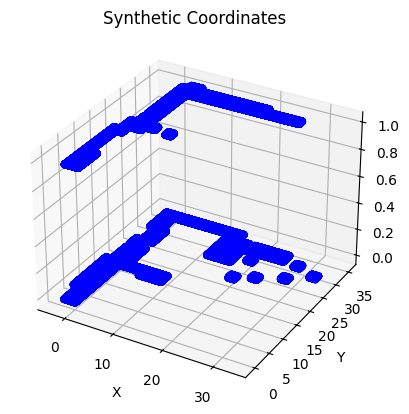

In [22]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the synthetic_coordinates
ax.scatter(synthetic_coordinates[:,0], synthetic_coordinates[:,1], synthetic_coordinates[:,2], c='b', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Synthetic Coordinates')

# Show plot
plt.show()

In [23]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert the coordinate data to a DataFrame
# df_coordinates = pd.DataFrame(synthetic_coordinates, columns=['x', 'y', 'z'])

# # Convert the rssi_values dictionary to a DataFrame
# original_df_rssi = pd.DataFrame.from_dict(rssi_values)

# # Calculate correlation matrix
# correlation_matrix = df_rssi.corrwith(df_coordinates)

# # Reset index to numeric type
# correlation_matrix.reset_index(drop=True, inplace=True)

# # Plot correlation matrix
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(correlation_matrix)), correlation_matrix)
# plt.title('Correlation between RSSI and Coordinates')
# plt.xlabel('Reference Point')
# plt.ylabel('Correlation Coefficient')
# plt.xticks(range(len(correlation_matrix)), range(len(correlation_matrix)), rotation=45)
# plt.grid(axis='y')
# plt.show()


Descriptive Statistics for RSSI Values:
       count       mean        std    min         25%        50%        75%  \
0   769014.0 -93.169452   9.780959 -100.0 -100.000000 -98.334750 -90.733134   
1   769014.0 -91.516851  11.522530 -100.0 -100.000000 -98.418241 -81.993473   
2   769014.0 -94.973473   6.763989 -100.0  -99.694478 -97.619268 -95.189285   
3   769014.0 -96.787121   4.909990 -100.0  -99.774226 -99.021498 -97.037366   
4   769014.0 -98.958674   1.475773 -100.0  -99.646692 -99.441808 -99.330961   
5   769014.0 -93.097514   8.817145 -100.0 -100.000000 -96.851272 -89.168938   
6   769014.0 -93.787532   9.150034 -100.0 -100.000000 -97.066749 -90.886554   
7   769014.0 -90.387848   9.920599 -100.0  -98.139098 -96.045992 -81.809934   
8   769014.0 -96.338307   5.689612 -100.0 -100.000000 -99.426229 -94.121108   
9   769014.0 -87.457226  10.898546 -100.0  -98.751583 -86.513828 -80.035477   
10  769014.0 -86.006963  11.348567 -100.0  -98.059678 -84.798956 -74.451460   
11  769014.0

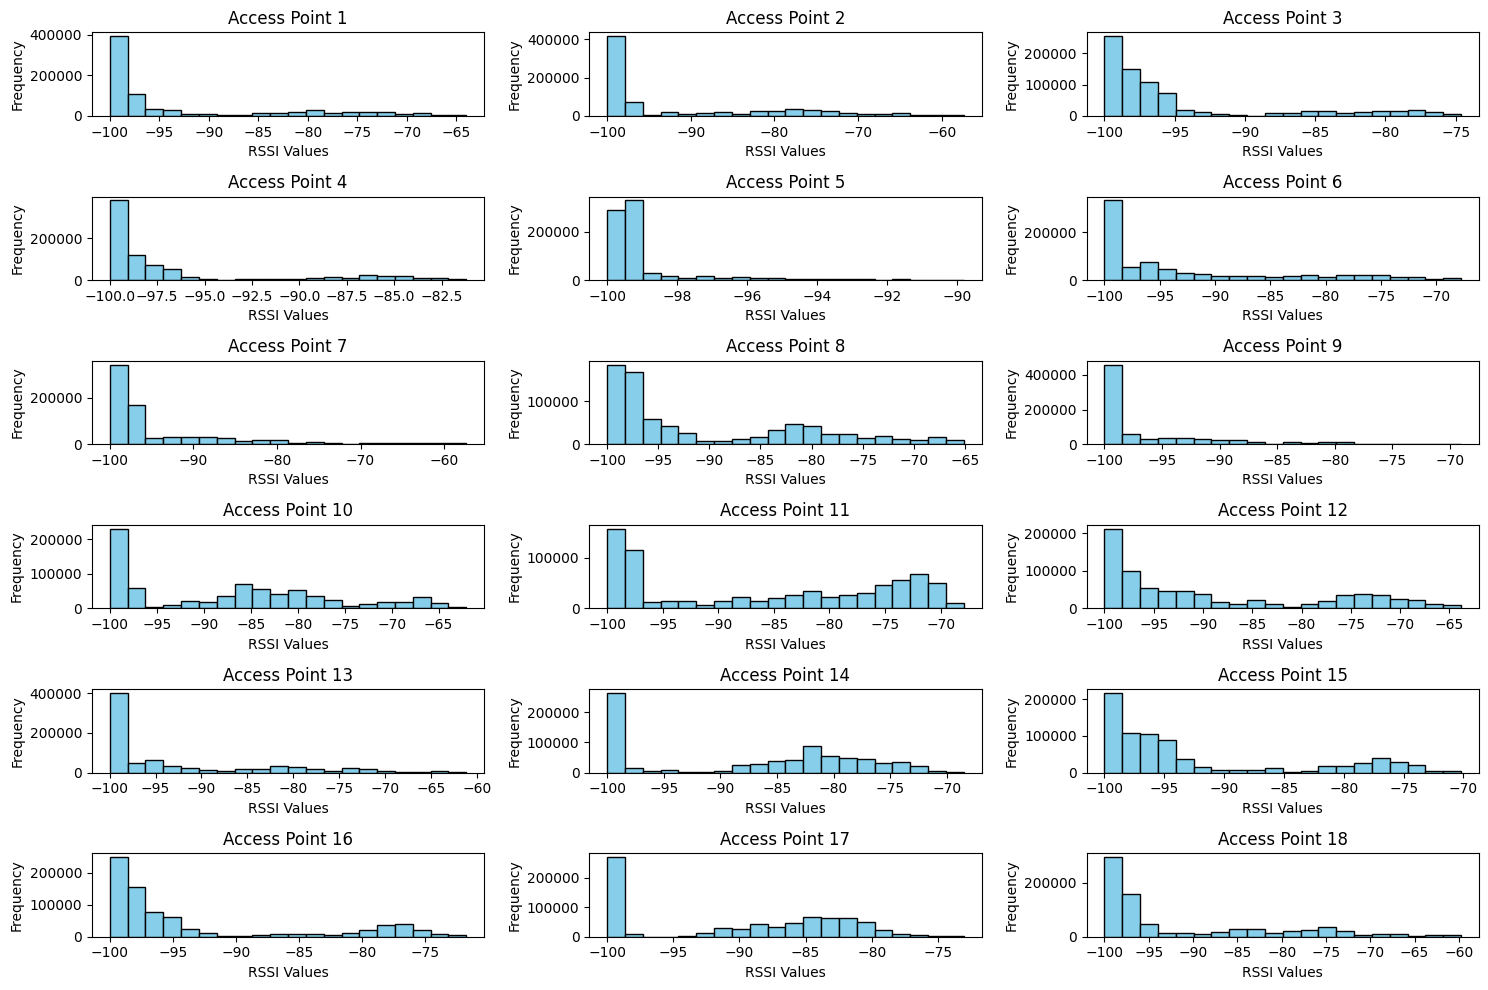

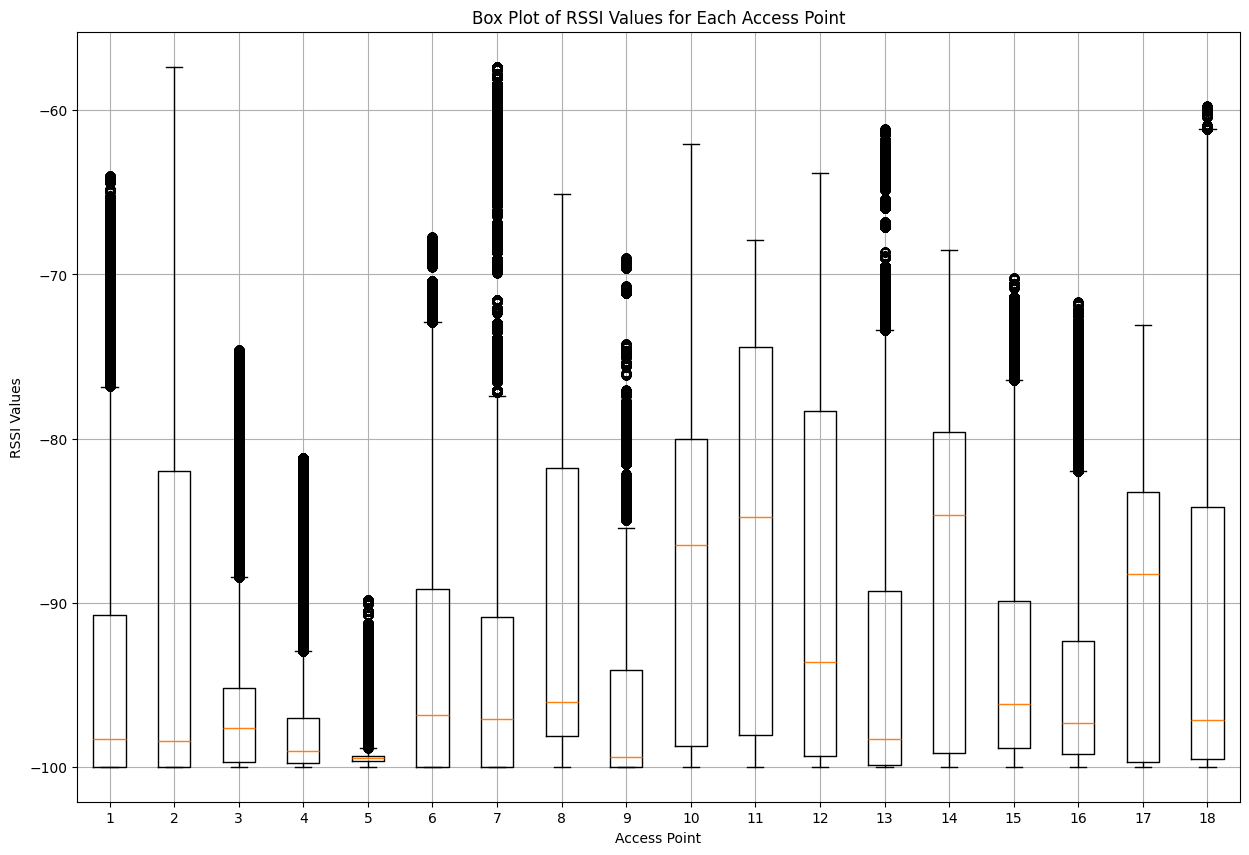

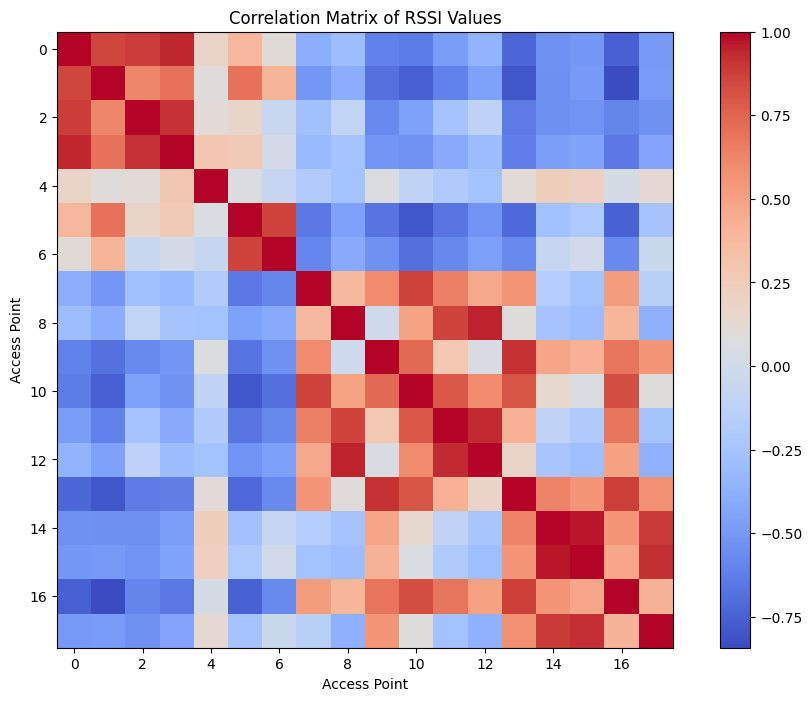

Shape of coordinates array: (769014, 3)
Shape of rssi_values array: (769014, 18)


C:\Users\prabw\AppData\Local\Temp\ipykernel_60092\1785177473.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


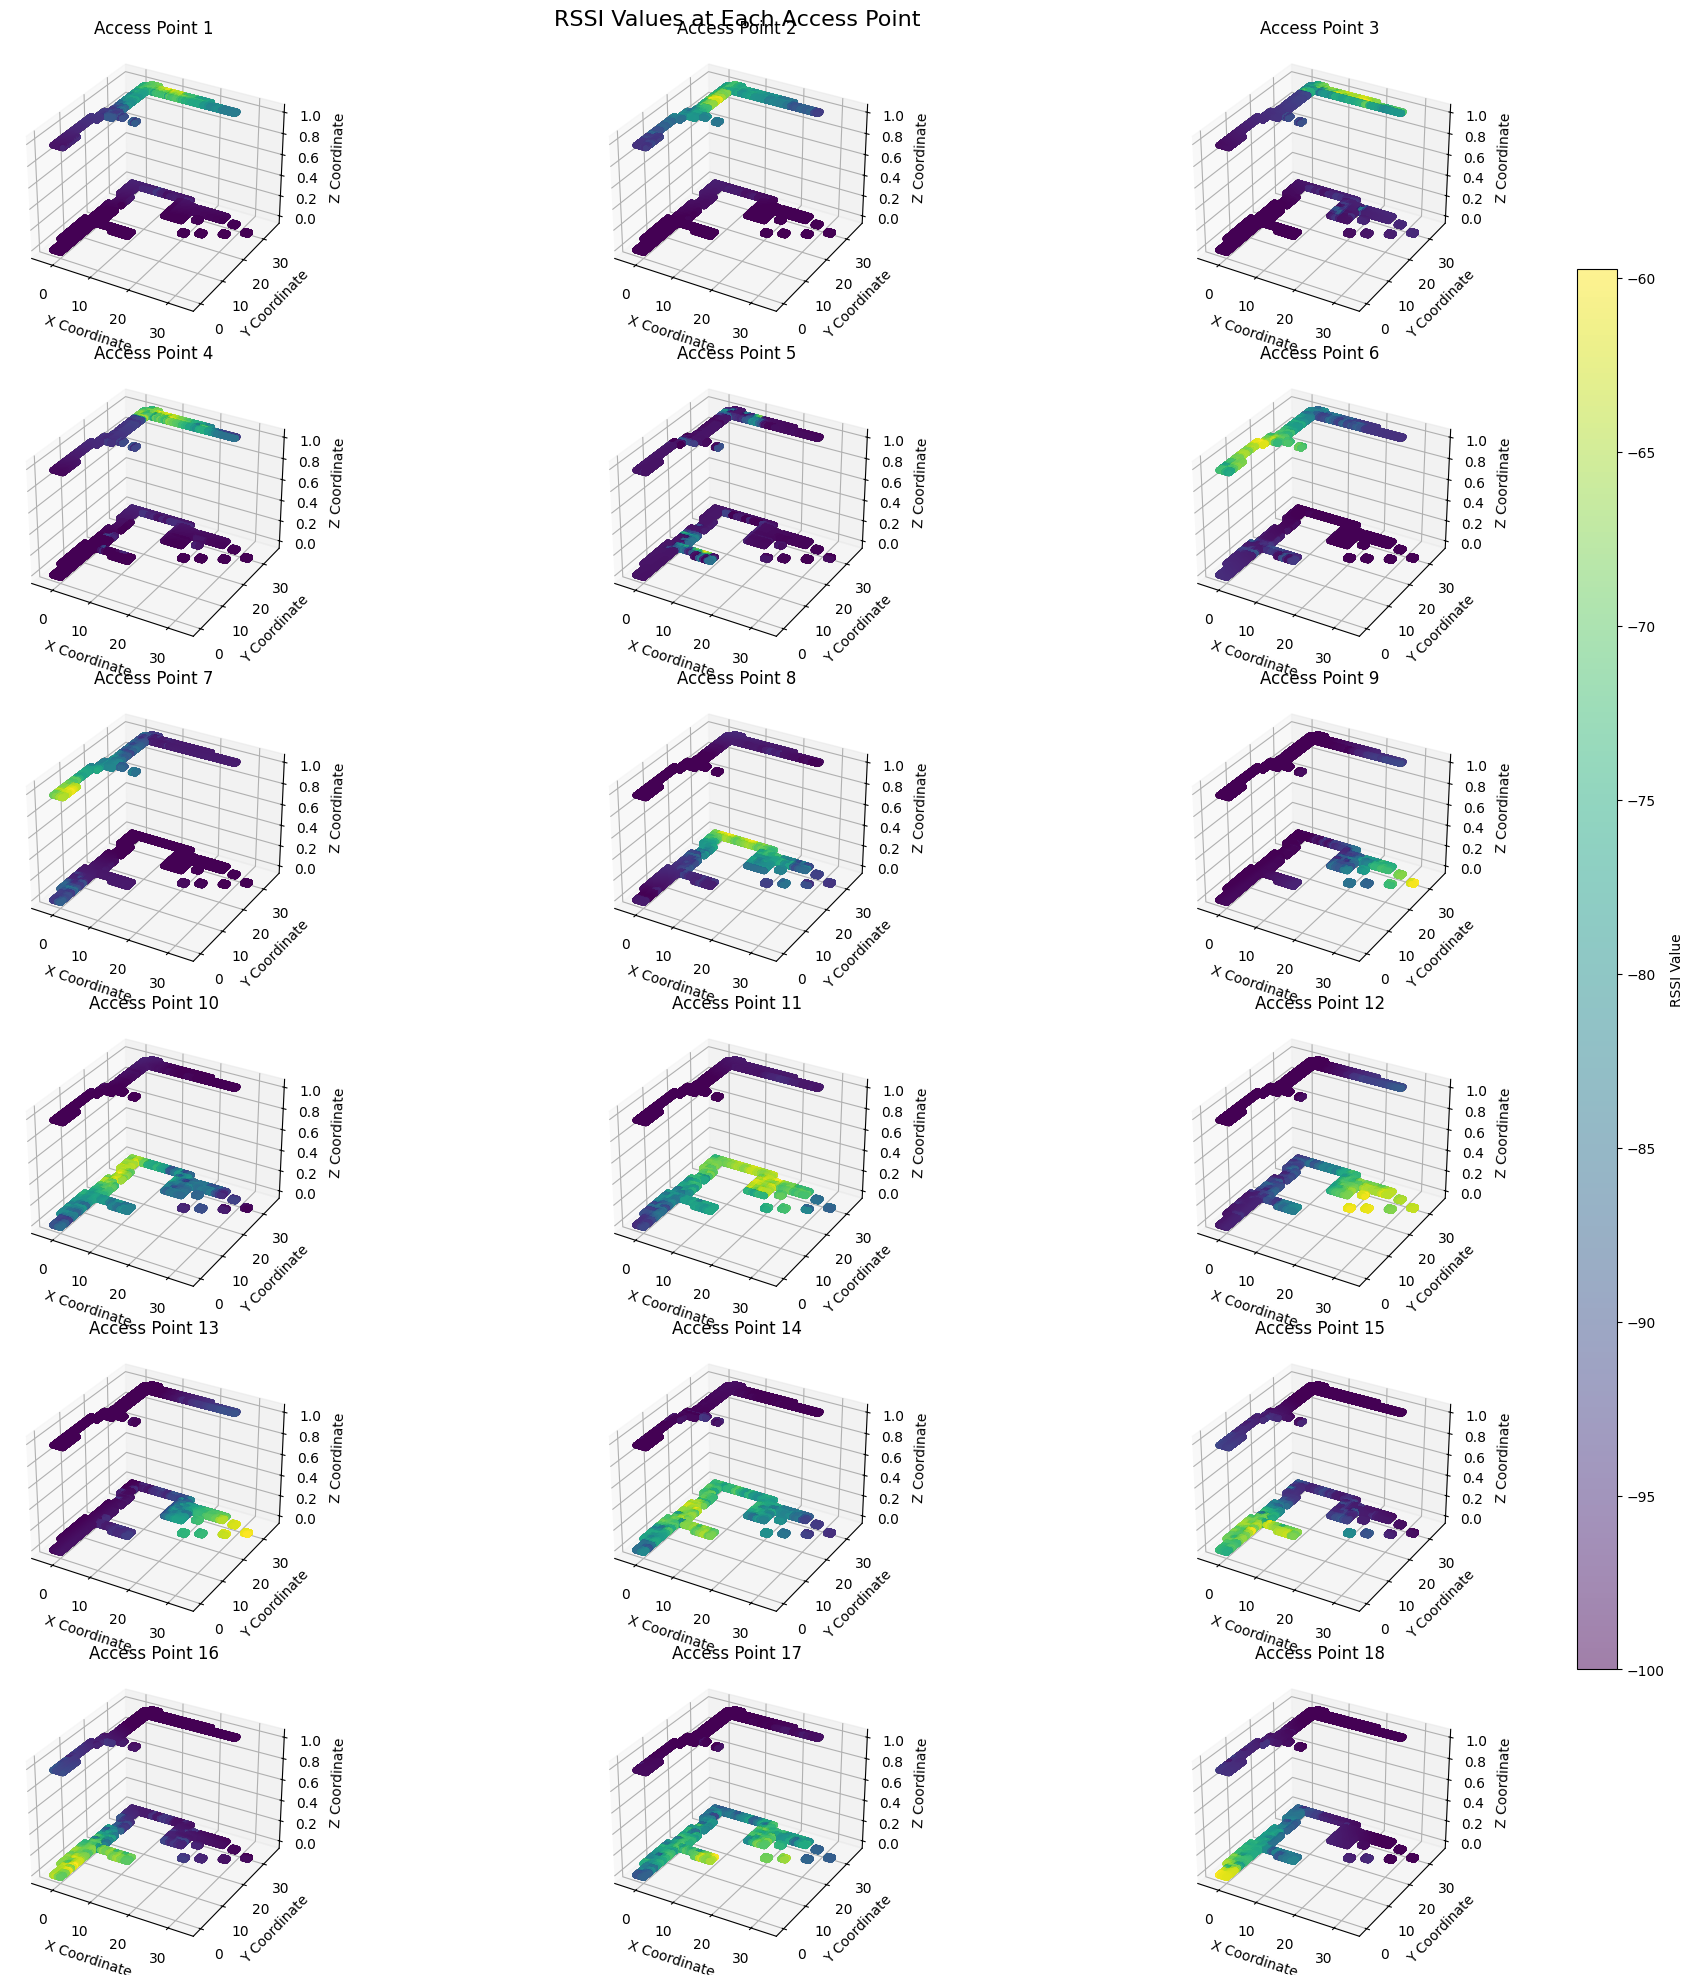

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df_rssi = pd.DataFrame.from_dict(ensemble_grid_search_predictions)

# Sample data (replace this with your actual data)
coordinates = synthetic_coordinates
rssi_values = df_rssi.values

# Descriptive Statistics
rssi_stats = pd.DataFrame(rssi_values).describe().transpose()
print("Descriptive Statistics for RSSI Values:")
print(rssi_stats)

# Histogram
plt.figure(figsize=(15, 10))
for i in range(18):
    plt.subplot(6, 3, i+1)
    plt.hist(rssi_values[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Access Point {i+1}')
    plt.xlabel('RSSI Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(15, 10))
plt.boxplot(rssi_values)
plt.title('Box Plot of RSSI Values for Each Access Point')
plt.xlabel('Access Point')
plt.ylabel('RSSI Values')
plt.xticks(np.arange(1, 19), np.arange(1, 19))
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = pd.DataFrame(rssi_values).corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of RSSI Values')
plt.xlabel('Access Point')
plt.ylabel('Access Point')
plt.show()


# Box plot
# Check the shape of the data arrays
print("Shape of coordinates array:", coordinates.shape)
print("Shape of rssi_values array:", rssi_values.shape)

# print(coordinates)
# print(rssi_values)

# Plotting
fig, axs = plt.subplots(6, 3, figsize=(20, 20), subplot_kw={'projection': '3d'})
fig.suptitle('RSSI Values at Each Access Point', fontsize=16)

for i in range(len(axs.flat)):
    ax = axs.flat[i]
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    z = coordinates[:, 2]
    rssi = rssi_values[:, i]
    # print(rssi.shape)

    # Scatter plot of synthetic coordinates colored by RSSI values
    sc = ax.scatter(x, y, z, c=rssi, cmap='viridis', s=10, alpha=0.5)

    # Set title
    ax.set_title(f'Access Point {i+1}')

    # Set labels
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')

# Add color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('RSSI Value')

plt.tight_layout()
plt.show()


Descriptive Statistics for RSSI Values:
       count       mean        std    min         25%        50%        75%  \
0   769014.0 -93.169452   9.780959 -100.0 -100.000000 -98.334750 -90.733134   
1   769014.0 -91.516851  11.522530 -100.0 -100.000000 -98.418241 -81.993473   
2   769014.0 -94.973473   6.763989 -100.0  -99.694478 -97.619268 -95.189285   
3   769014.0 -96.787121   4.909990 -100.0  -99.774226 -99.021498 -97.037366   
4   769014.0 -98.958674   1.475773 -100.0  -99.646692 -99.441808 -99.330961   
5   769014.0 -93.097514   8.817145 -100.0 -100.000000 -96.851272 -89.168938   
6   769014.0 -93.787532   9.150034 -100.0 -100.000000 -97.066749 -90.886554   
7   769014.0 -90.387848   9.920599 -100.0  -98.139098 -96.045992 -81.809934   
8   769014.0 -96.338307   5.689612 -100.0 -100.000000 -99.426229 -94.121108   
9   769014.0 -87.457226  10.898546 -100.0  -98.751583 -86.513828 -80.035477   
10  769014.0 -86.006963  11.348567 -100.0  -98.059678 -84.798956 -74.451460   
11  769014.0

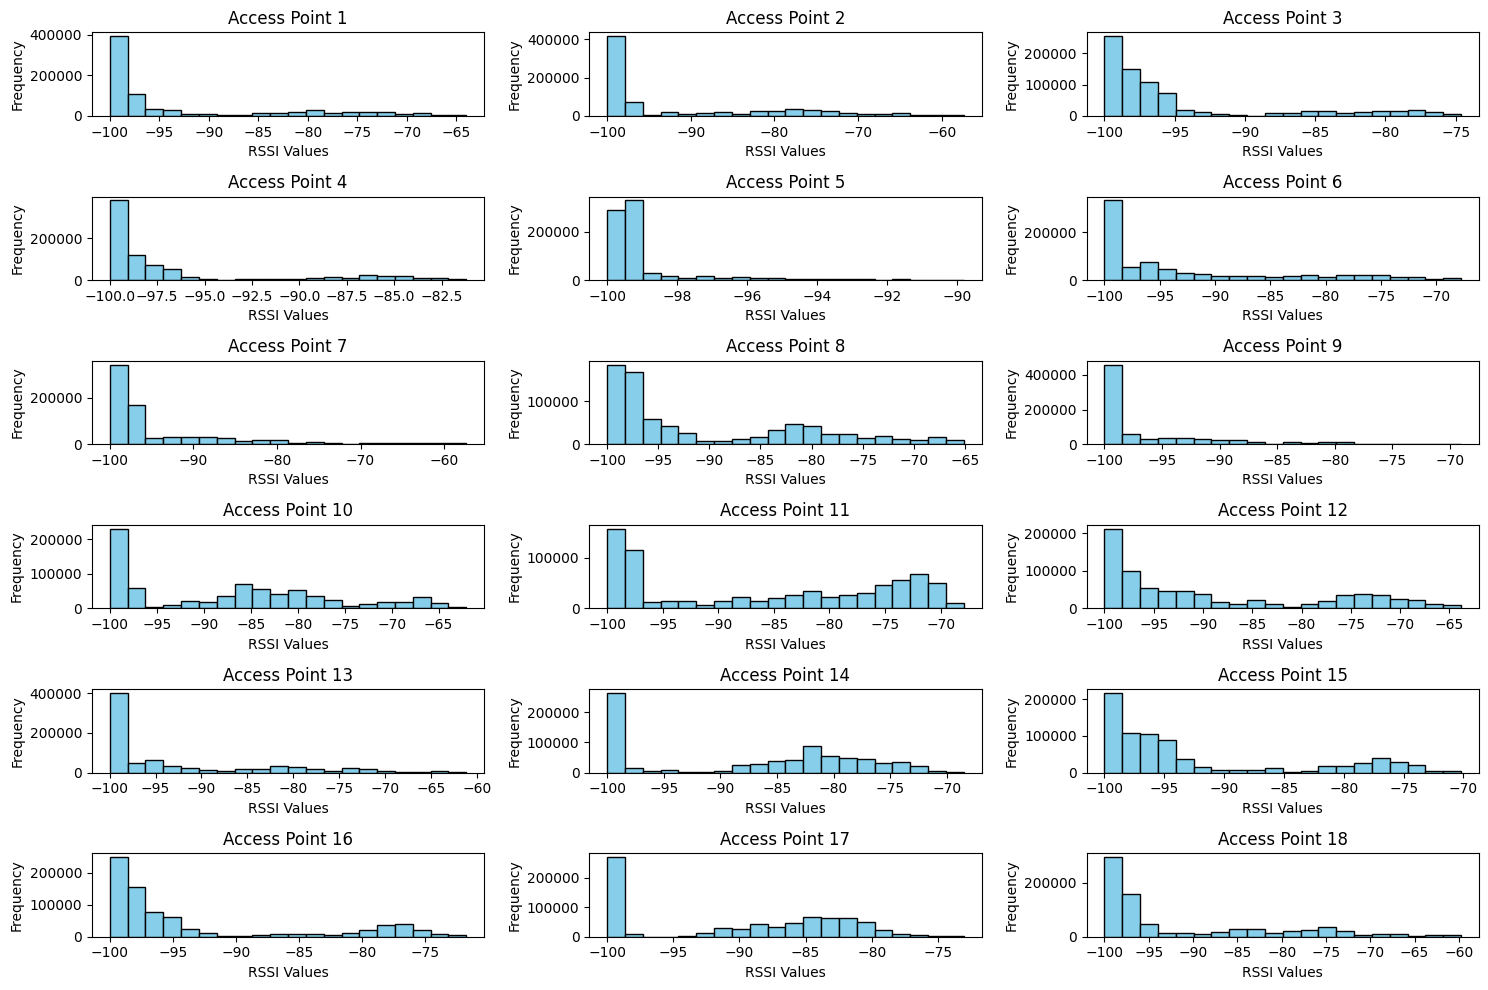

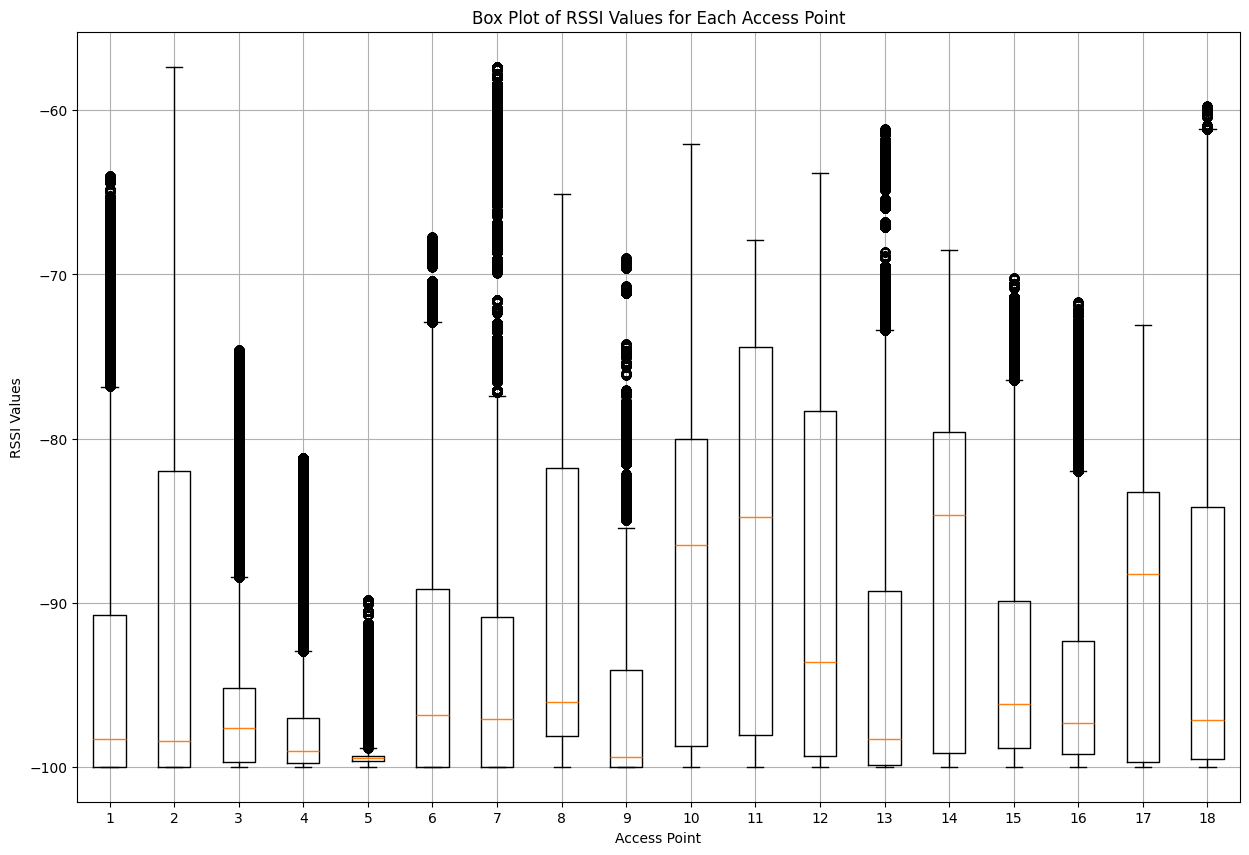

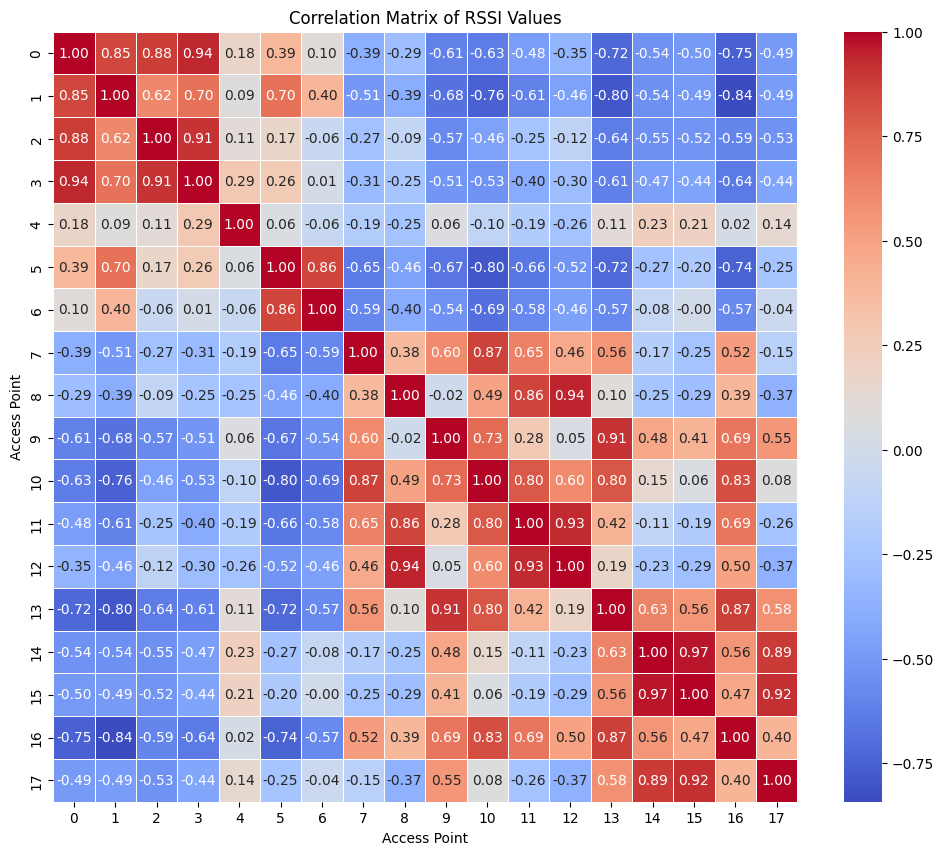

In [25]:
import seaborn as sns
# Descriptive Statistics
rssi_stats = pd.DataFrame(rssi_values).describe().transpose()
print("Descriptive Statistics for RSSI Values:")
print(rssi_stats)

# Histogram
plt.figure(figsize=(15, 10))
for i in range(18):
    plt.subplot(6, 3, i+1)
    plt.hist(rssi_values[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Access Point {i+1}')
    plt.xlabel('RSSI Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(15, 10))
plt.boxplot(rssi_values)
plt.title('Box Plot of RSSI Values for Each Access Point')
plt.xlabel('Access Point')
plt.ylabel('RSSI Values')
plt.xticks(np.arange(1, 19), np.arange(1, 19))
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = pd.DataFrame(rssi_values).corr()
plt.figure(figsize=(12, 10))
# plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.colorbar()
plt.title('Correlation Matrix of RSSI Values')
plt.xlabel('Access Point')
plt.ylabel('Access Point')
plt.show()

Number of values replaced with NaN: 6149434
Percentage of values converted to NaN: 38.078655326975905 %
[[-0.6        -0.6         0.        ]
 [-0.6        -0.5         0.        ]
 [-0.6        -0.4         0.        ]
 ...
 [ 9.80000019 17.79999962  1.        ]
 [ 9.80000019 17.89999962  1.        ]
 [ 9.80000019 17.99999962  1.        ]]
[[         nan          nan          nan ... -75.27776773 -92.46191432
  -61.11092052]
 [         nan          nan          nan ... -75.30043191 -92.46639197
  -61.12882114]
 [         nan          nan          nan ... -75.32309608 -92.47086962
  -61.14672177]
 ...
 [-90.1799375  -80.70874275 -93.33710321 ...          nan          nan
           nan]
 [-90.15594089 -80.69005019 -93.32301485 ...          nan          nan
           nan]
 [-90.52842538 -80.83703321 -93.4825072  ...          nan          nan
           nan]]
Descriptive Statistics for RSSI Values:
       count       mean        std        min        25%        50%  \
0   369058.0 -86.

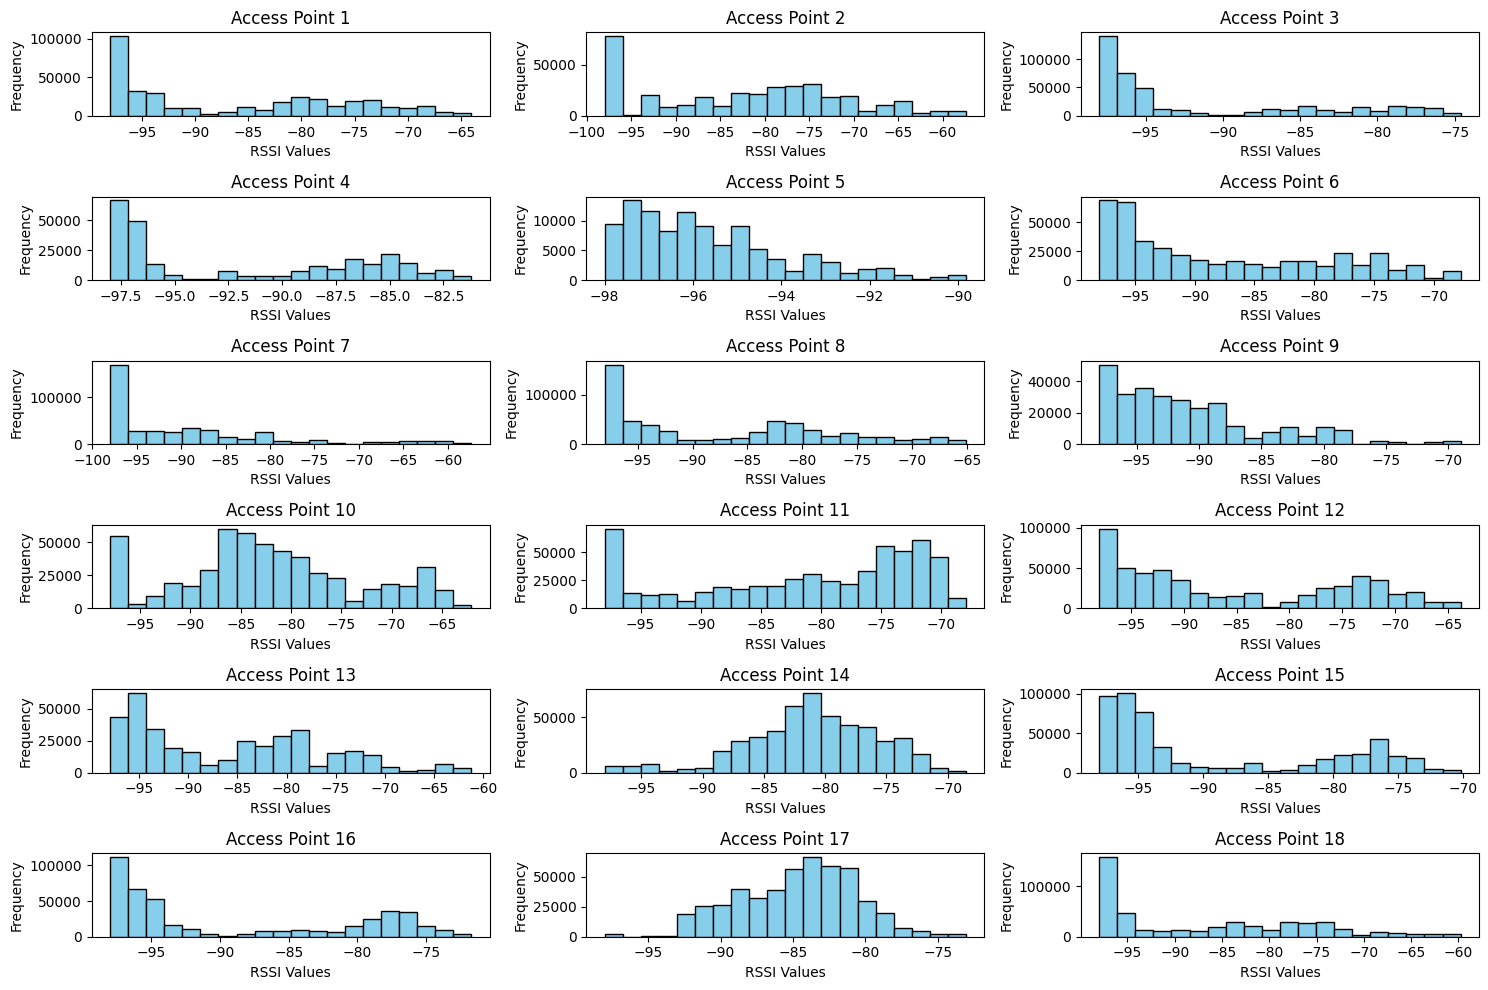

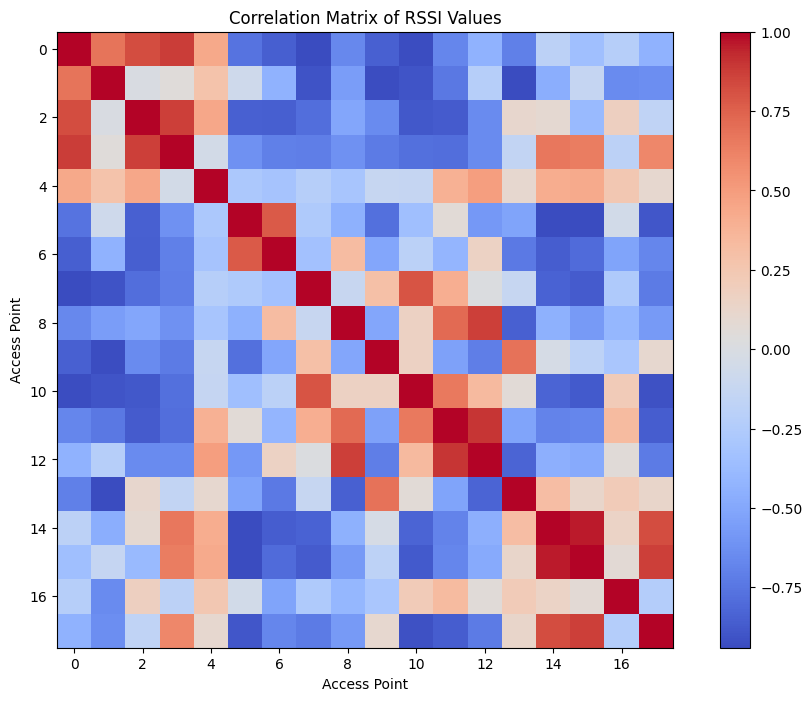

C:\Users\prabw\AppData\Local\Temp\ipykernel_60092\1246793448.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


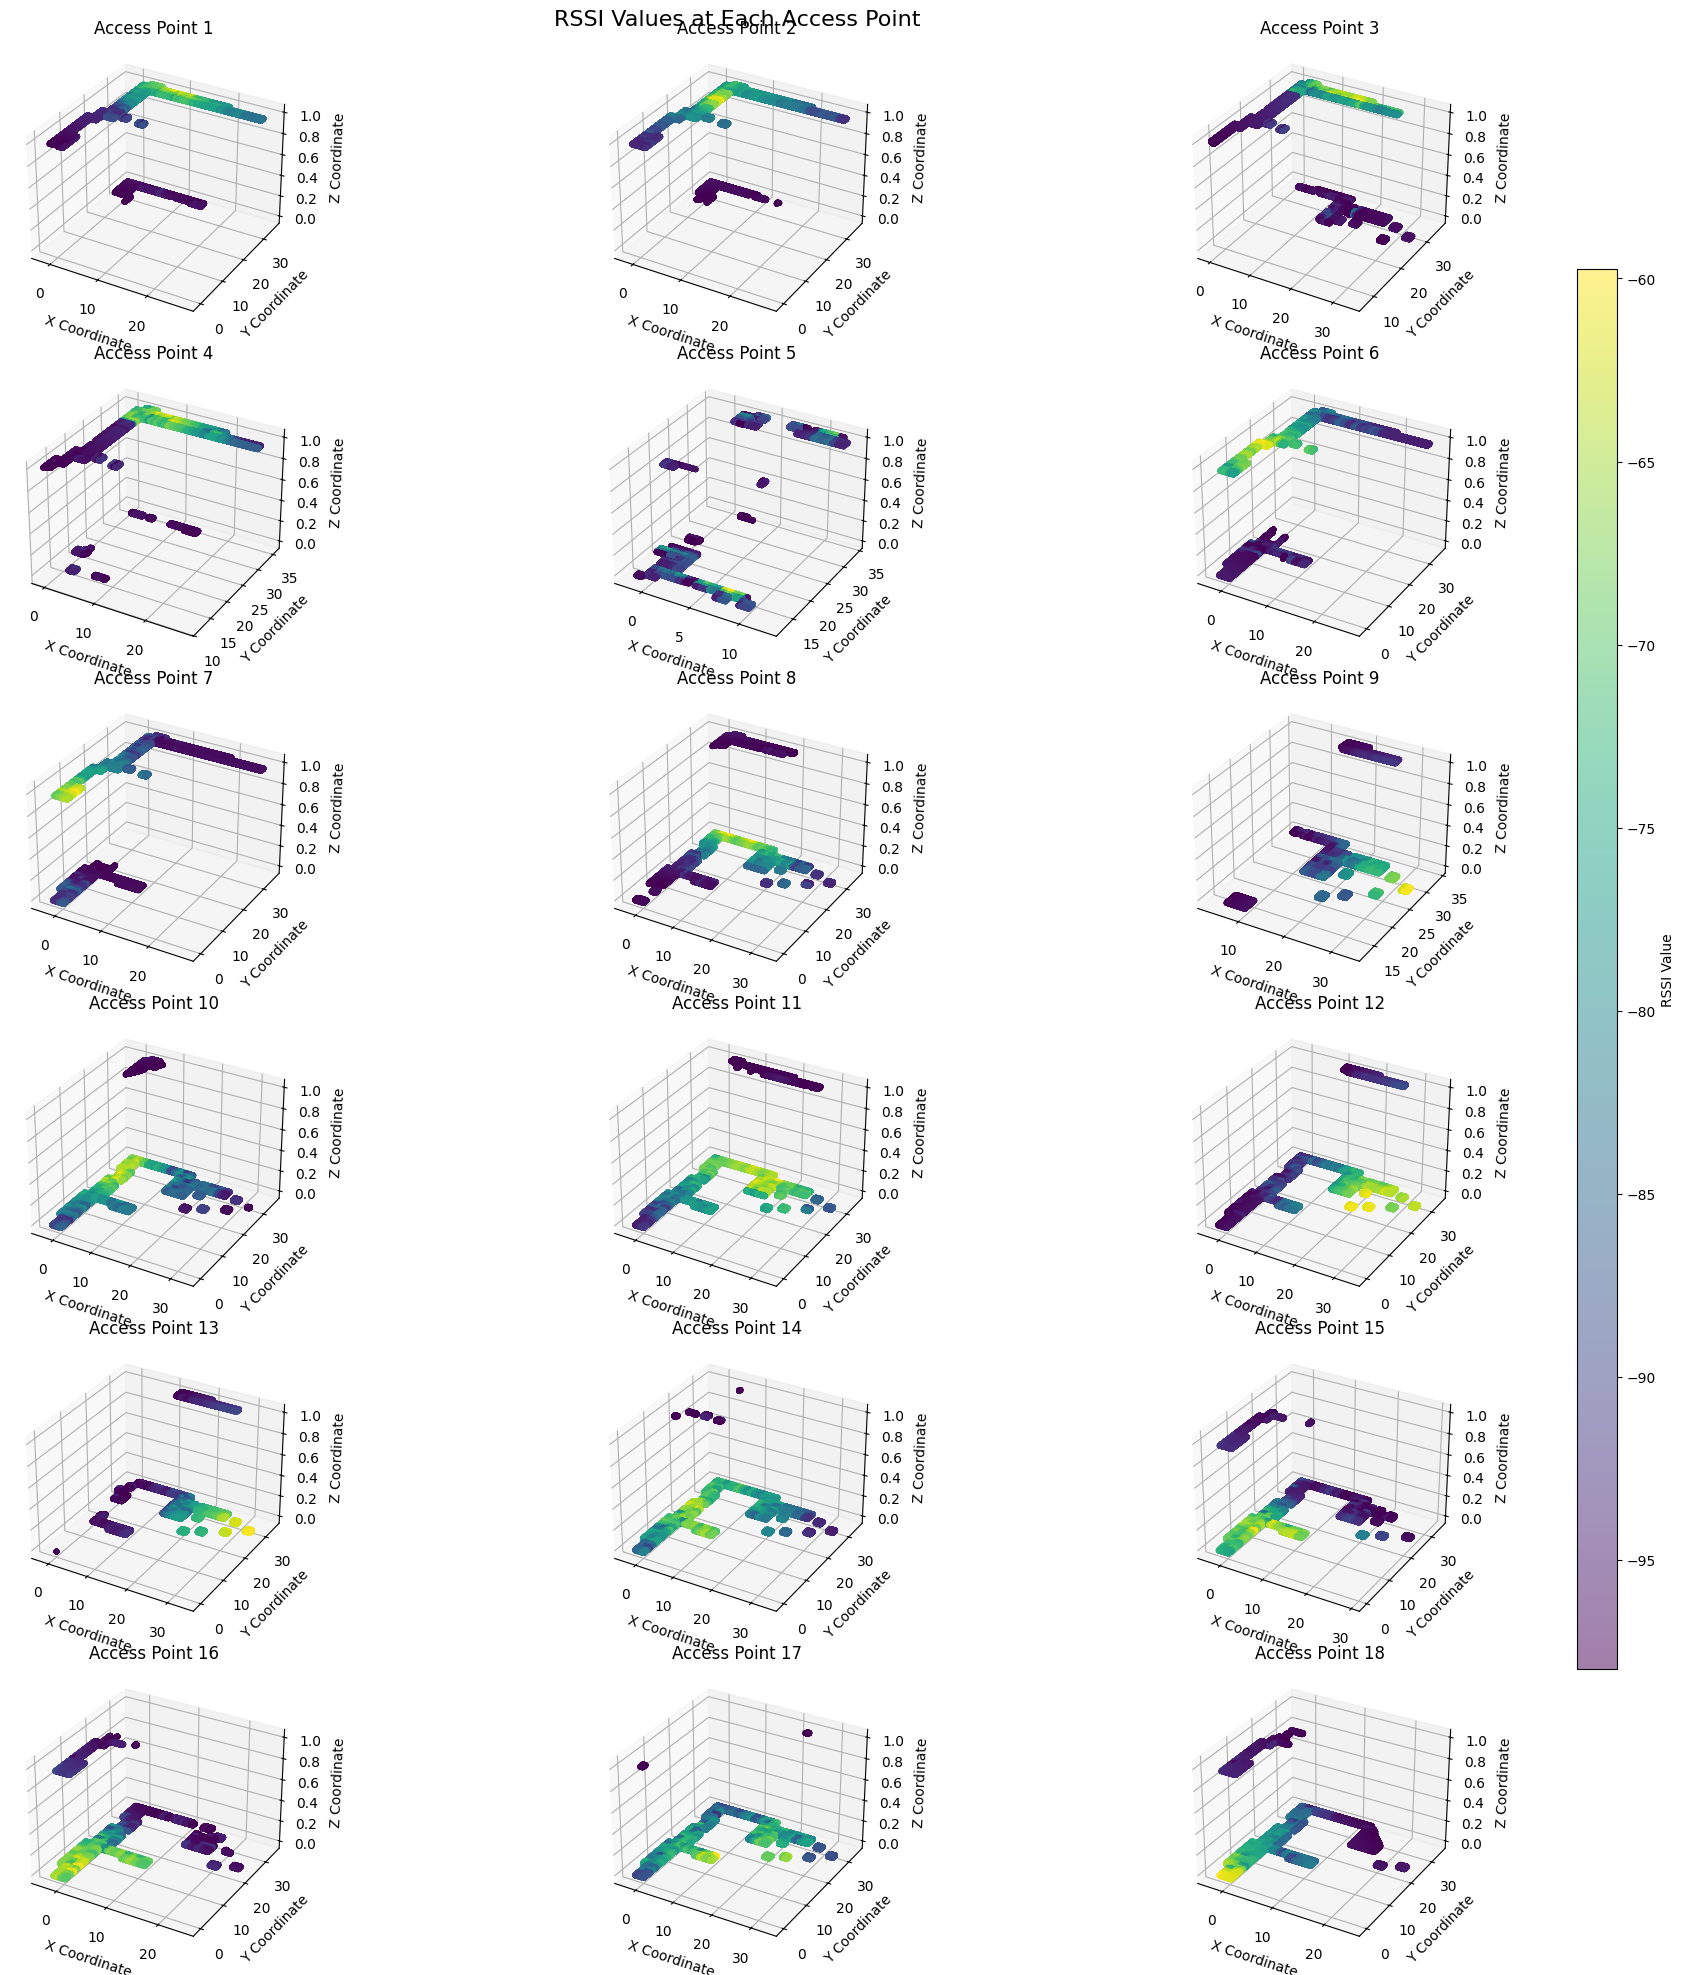

In [26]:
# Import data
data = pd.read_csv('synthetic_data_RandomSeaerch_Ensemble.csv')

threshold = -98  # Define the threshold value
# data.replace(to_replace=-100, value=np.nan, inplace=True)
# data.replace(to_replace=[data <= threshold], value=np.nan, inplace=True)
data[data <= threshold] = np.nan


# Count the number of NaN values after thresholding
nan_count = data.isna().sum().sum()
print("Number of values replaced with NaN:", nan_count)


# Calculate the total number of values
total_values = data.shape[0] * data.shape[1]
# Calculate the percentage of NaN values
nan_percentage = (nan_count / total_values) * 100
print("Percentage of values converted to NaN:", nan_percentage, "%")


# Separate coordinates and RSSI values
coordinates = data[['x', 'y', 'z']].values
rssi_values = data.iloc[:, 0:18].values

print(coordinates)
print(rssi_values)

# Descriptive Statistics
rssi_stats = pd.DataFrame(rssi_values).describe().transpose()
print("Descriptive Statistics for RSSI Values:")
print(rssi_stats)

# Histogram
plt.figure(figsize=(15, 10))
for i in range(18):
    plt.subplot(6, 3, i+1)
    plt.hist(rssi_values[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Access Point {i+1}')
    plt.xlabel('RSSI Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_matrix = pd.DataFrame(rssi_values).corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of RSSI Values')
plt.xlabel('Access Point')
plt.ylabel('Access Point')
plt.show()

# Plotting
fig, axs = plt.subplots(6, 3, figsize=(20, 20), subplot_kw={'projection': '3d'})
fig.suptitle('RSSI Values at Each Access Point', fontsize=16)

for i in range(len(axs.flat)):
    ax = axs.flat[i]
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    z = coordinates[:, 2]
    rssi = rssi_values[:, i]
    # print(rssi.shape)

    # Scatter plot of synthetic coordinates colored by RSSI values
    sc = ax.scatter(x, y, z, c=rssi, cmap='viridis', s=10, alpha=0.5)

    # Set title
    ax.set_title(f'Access Point {i+1}')

    # Set labels
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')

# Add color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('RSSI Value')

plt.tight_layout()
plt.show()



Shape of RSSI values array: (769014, 18)
18
Minimum RSSI value: -97.99999472652112
Maximum RSSI value: -57.344607432341135
18


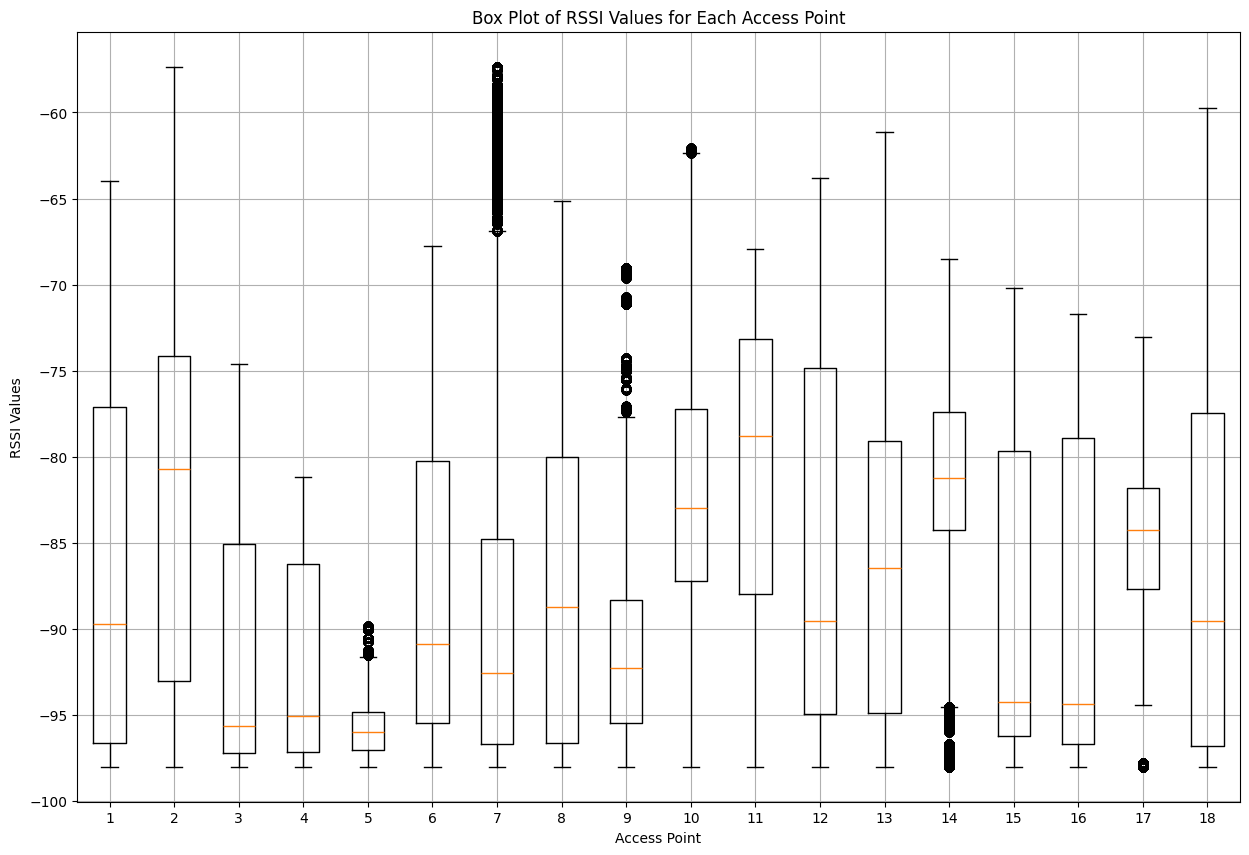

In [27]:
# Check the dimensions of the RSSI values array
print("Shape of RSSI values array:", rssi_values.shape)

# for i in range(len(rssi_values)):
#     print(rssi_values[i])

print(len(rssi_values[-1]))

# Convert RSSI values to numeric format
# rssi_values_numeric = pd.to_numeric(data.iloc[:, 1:].stack(), errors='coerce').values
# np.savetxt("rssi_values_numeric.csv", rssi_values, delimiter=",")

# Check the minimum and maximum RSSI values again
min_rssi = np.nanmin(rssi_values)
max_rssi = np.nanmax(rssi_values)

print("Minimum RSSI value:", min_rssi)
print("Maximum RSSI value:", max_rssi)


rssi_values_without_nan = [rssi_values[:, i][~np.isnan(rssi_values[:, i])] for i in range(18)]

print(len(rssi_values_without_nan))
# print(len(rssi_values_without_nan[-1]))

# Plot box plot
plt.figure(figsize=(15, 10))
plt.boxplot(rssi_values_without_nan)
plt.title('Box Plot of RSSI Values for Each Access Point')
plt.xlabel('Access Point')
plt.ylabel('RSSI Values')
plt.xticks(np.arange(1, 19), np.arange(1, 19))
plt.grid(True)
plt.show()
